In [17]:
import keras
import keras
from keras.utils import np_utils
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers import BatchNormalization
from keras.preprocessing.image import array_to_img, img_to_array, list_pictures, load_img
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd

df = pd.read_csv("data_all.csv")
# df.head()

x, t = [], []

for (i, row) in df.iterrows():
    filepath = row['filepath']
    tmp_img = load_img(filepath, target_size=(32,32))
    img = img_to_array(tmp_img) / 255.0 # -> float32 + 正規化
    
    # データに追加
    x.append(img)
    t.append(row['label'])
    
# numpyに変換
x = np.array(x, 'f')

# x.shape

# クラスの形式を変換 <- one-hot表現
t = np_utils.to_categorical(t, 2)

# 学習用データとテストデータ
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.33, random_state=1)



In [24]:
x_train.shape[1:]

(32, 32, 3)

In [25]:
# CNNを構築
model = Sequential()

model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(2))       # クラスは2個
model.add(Activation('softmax'))

# コンパイル
model.compile(loss='categorical_crossentropy',
              optimizer='Adam',
              metrics=['accuracy'])

# 実行。出力はなしで設定(verbose=0)。
history = model.fit(x_train, t_train, batch_size=10, epochs=50,
                   validation_data = (x_test, t_test))

Train on 824 samples, validate on 406 samples
Epoch 1/50
824/824 [==============================] - 11s 13ms/step - loss: 2.7309 - acc: 0.5704 - val_loss: 1.2814 - val_acc: 0.5148
Epoch 2/50
824/824 [==============================] - 9s 11ms/step - loss: 0.6749 - acc: 0.6566 - val_loss: 0.8325 - val_acc: 0.6158
Epoch 3/50
824/824 [==============================] - 9s 11ms/step - loss: 0.4796 - acc: 0.7646 - val_loss: 0.8535 - val_acc: 0.6305
Epoch 4/50
824/824 [==============================] - 9s 11ms/step - loss: 0.3359 - acc: 0.8410 - val_loss: 1.0227 - val_acc: 0.6158
Epoch 5/50
824/824 [==============================] - 10s 12ms/step - loss: 0.2494 - acc: 0.9005 - val_loss: 1.2114 - val_acc: 0.6207
Epoch 6/50
824/824 [==============================] - 10s 12ms/step - loss: 0.2129 - acc: 0.9114 - val_loss: 1.4487 - val_acc: 0.6010
Epoch 7/50
824/824 [==============================] - 11s 14ms/step - loss: 0.1622 - acc: 0.9417 - val_loss: 1.2229 - val_acc: 0.5936
Epoch 8/50
824/824 

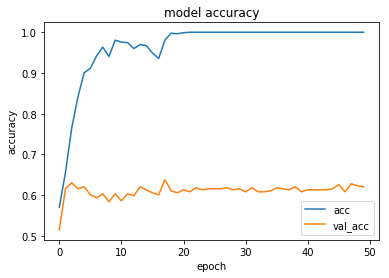

In [27]:


plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['acc', 'val_acc'], loc='lower right')
plt.show()